In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [2]:
dataset = pd.read_csv('telecom_users.csv')#import dataset
dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)#Dropping unnecesarry features
dataset.drop("customerID",axis=1,inplace = True)

In [4]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [7]:
dataset.isnull().sum()#checking Null values in Dataset

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors = 'coerce')#Converting Total charges to numerical

In [9]:
dataset['TotalCharges'].isnull().sum()#checking null values

10

In [10]:
dataset["TotalCharges"]=dataset["TotalCharges"].fillna(dataset["TotalCharges"].mean())#replacing null values with mean value

In [11]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2272.226516
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,406.275000
50%,0.000000,29.000000,70.400000,1414.550000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data analysis

In [12]:
numerical_feature = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']#extracting numerical features from data
numerical_feature

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [13]:
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtype == "O"]#extracting categorical features from data
categorical_feature

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [14]:
for feature in categorical_feature: #calculating no of categories in features
    print("{} has {} features".format(feature,len(dataset[feature].unique())))

gender has 2 features
Partner has 2 features
Dependents has 2 features
PhoneService has 2 features
MultipleLines has 3 features
InternetService has 3 features
OnlineSecurity has 3 features
OnlineBackup has 3 features
DeviceProtection has 3 features
TechSupport has 3 features
StreamingTV has 3 features
StreamingMovies has 3 features
Contract has 3 features
PaperlessBilling has 2 features
PaymentMethod has 4 features
Churn has 2 features


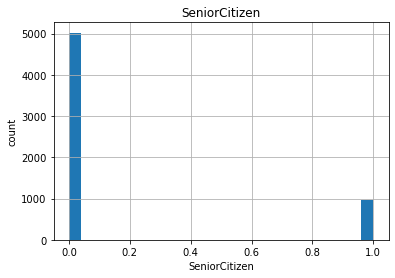

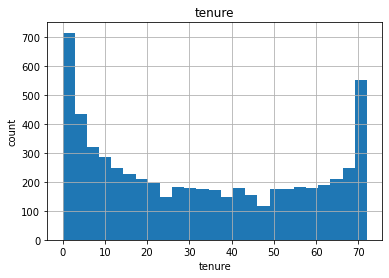

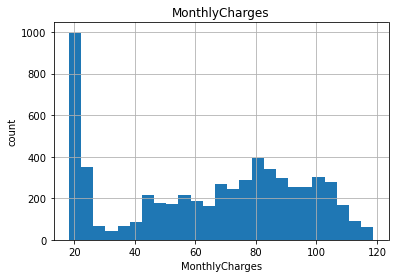

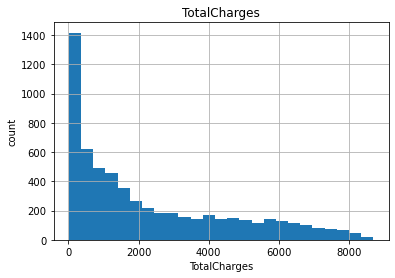

In [15]:
for feature in numerical_feature: #distribution of numerical values
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

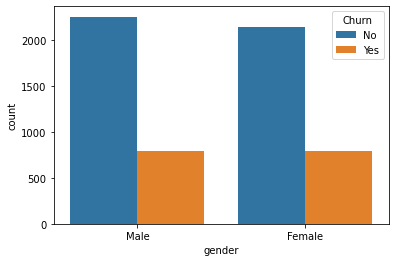

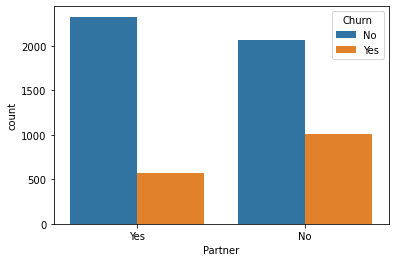

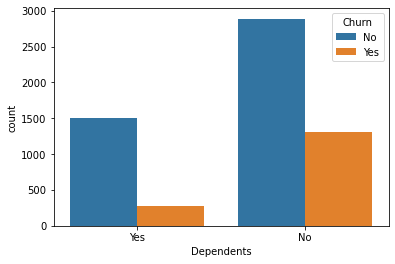

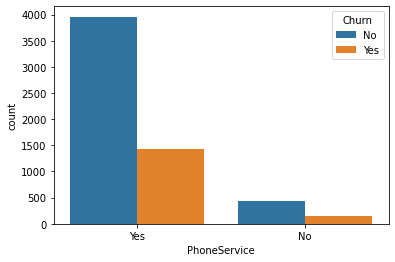

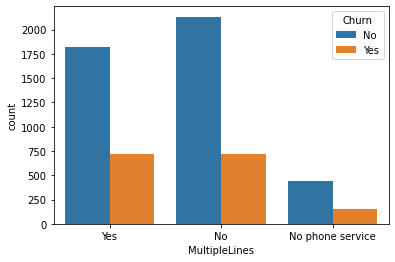

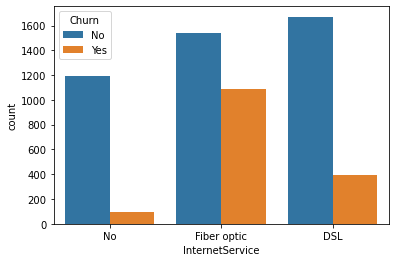

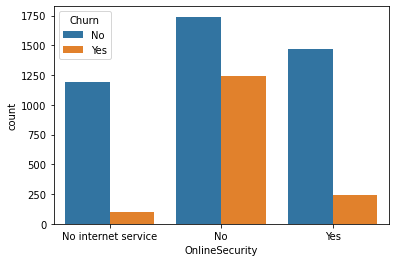

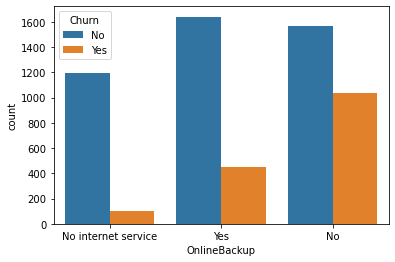

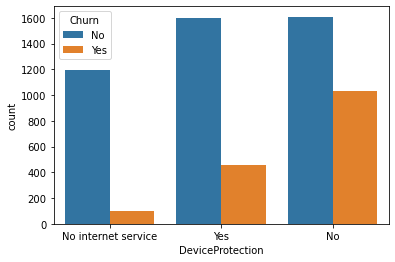

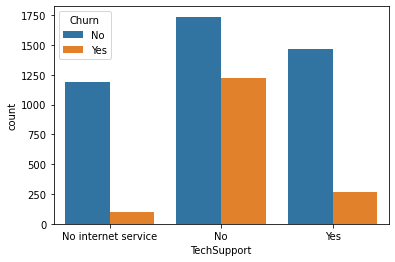

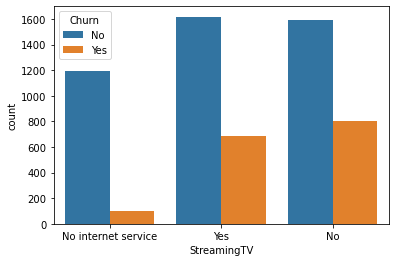

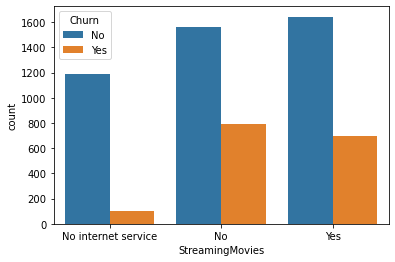

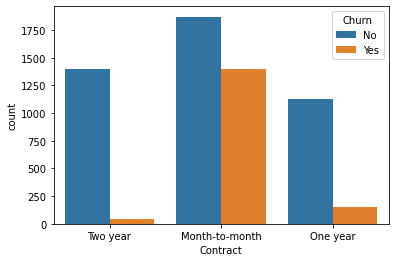

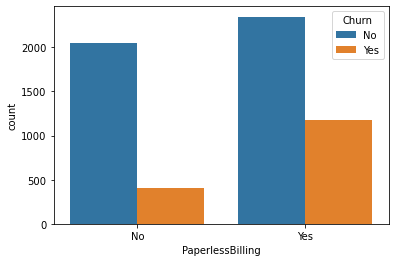

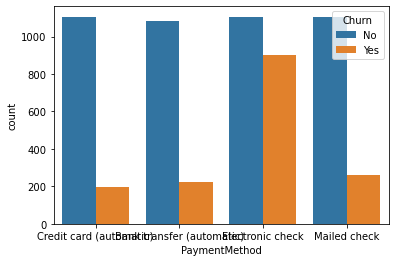

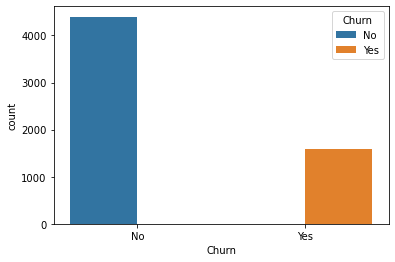

In [16]:
for feature in categorical_feature: #evaluating the impact of categorical features on churn
    sns.countplot(data=dataset,x=feature,hue = 'Churn')
    plt.show()

## Data Preprocessing

In [17]:
dataset = pd.get_dummies(data=dataset, columns= categorical_feature,drop_first=True)#one hot encoding

In [18]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,72,24.10,1734.65,1,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
1,0,44,88.15,3973.20,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,1,38,74.95,2869.85,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,4,55.90,238.50,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,2,53.45,119.50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


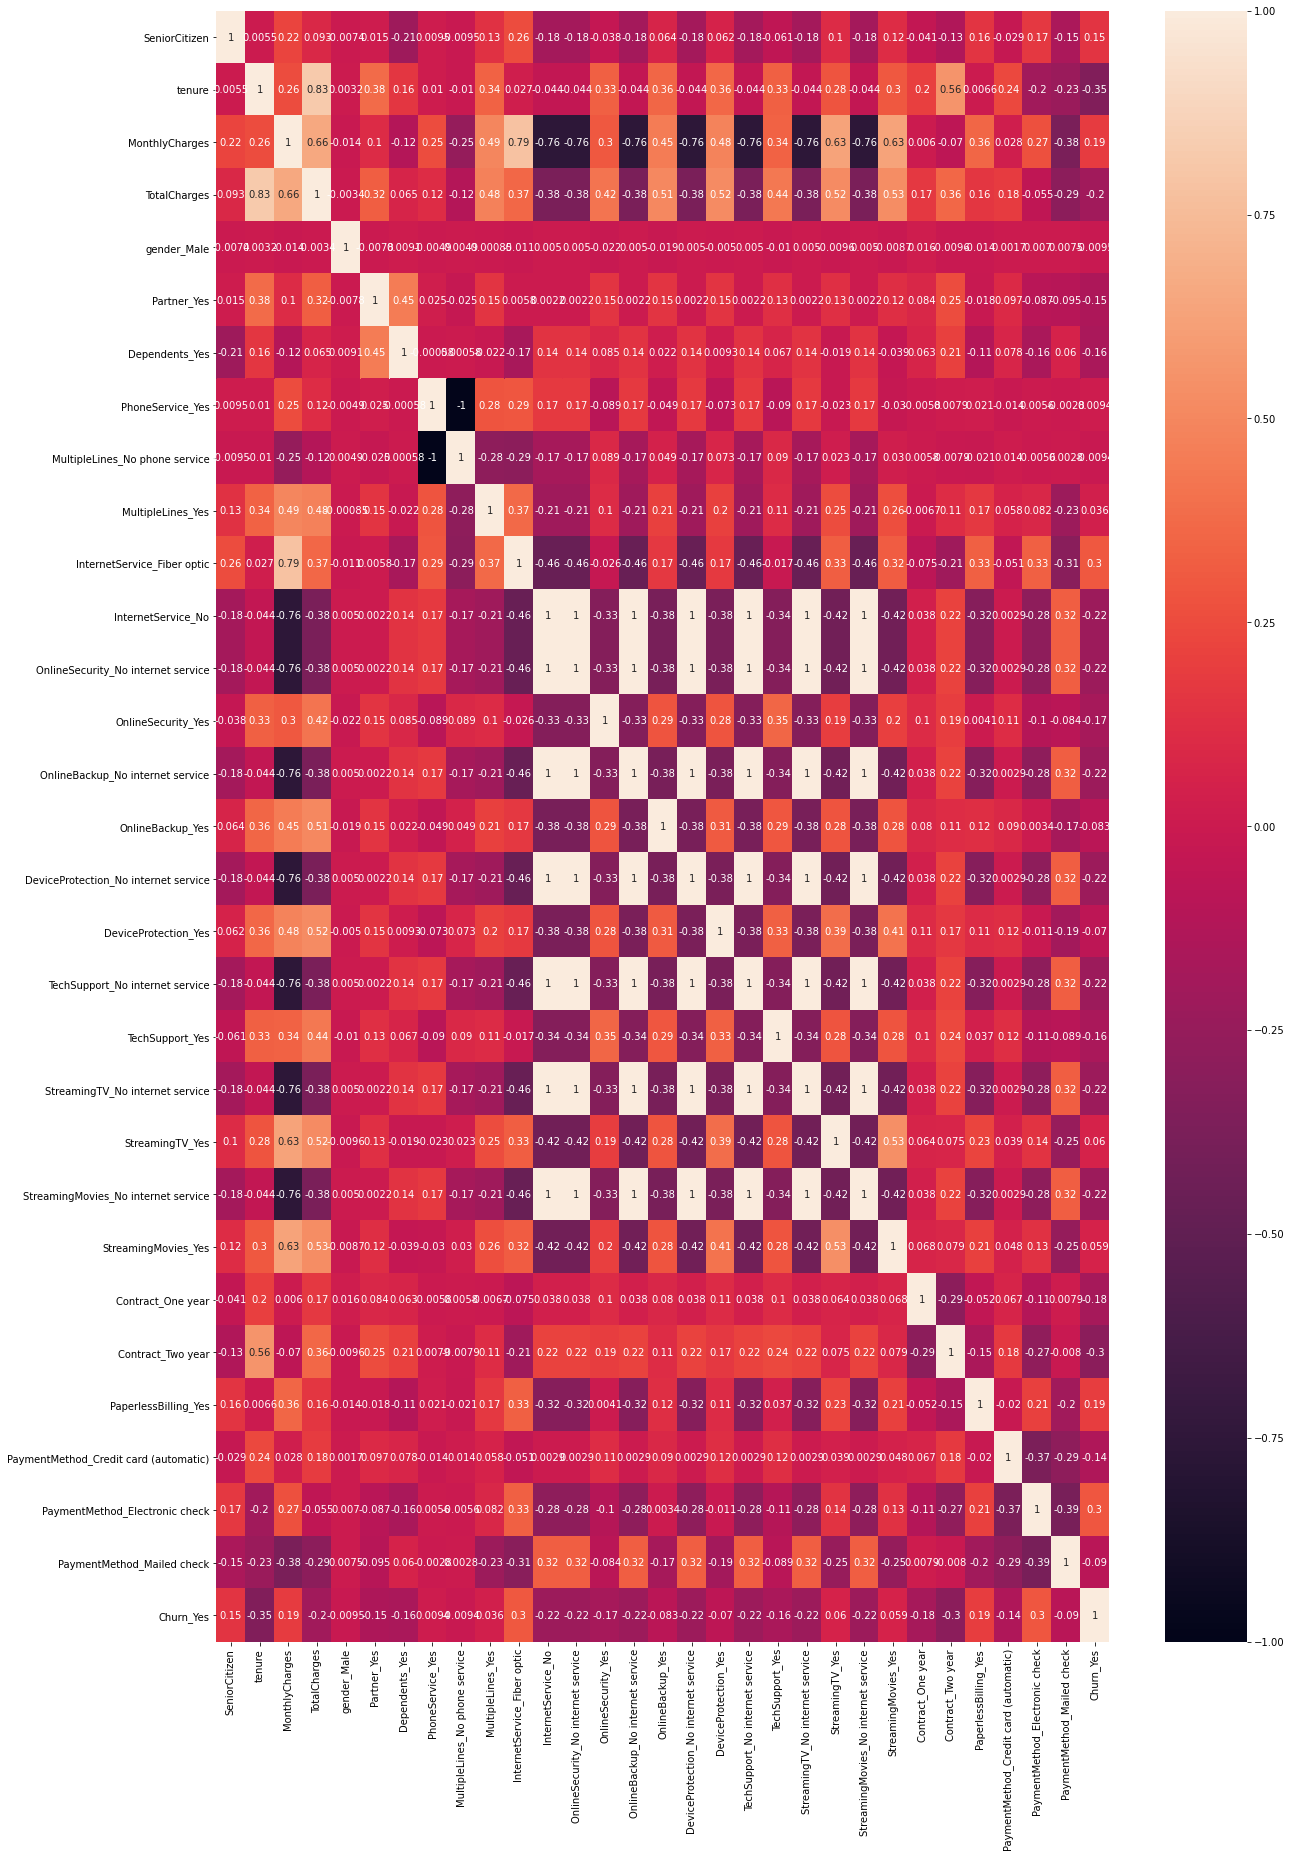

In [19]:
import matplotlib.pyplot as plt #evaluating correlation
plt.rcParams["figure.figsize"] = (20,30)
sns.heatmap(dataset.corr(),annot=True)

In [20]:
def corr(dataset,threshold): #this function will select features with high correlation 
    corr_matrix = dataset.corr()
    col_corr = set()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j]> threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
                

In [21]:
corr_features = corr(dataset,0.85)
len(corr_features)

6

In [22]:
corr_features #highly correlated features

{'DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

In [23]:
drop_features = ['DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service']

In [24]:
dataset.drop(drop_features,axis=1,inplace=True)#dropping highly correlated features

In [25]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,72,24.10,1734.65,1,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
1,0,44,88.15,3973.20,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
2,1,38,74.95,2869.85,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,4,55.90,238.50,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,2,53.45,119.50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
dataset['Churn_Yes'].value_counts()#checking for imbalances in target variable

0    4399
1    1587
Name: Churn_Yes, dtype: int64

In [27]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,...,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2298.060617,0.509522,0.485132,0.299198,0.901437,0.098563,0.425660,...,0.289843,0.385232,0.390745,0.213164,0.240728,0.589375,0.217675,0.335115,0.228700,0.265119
std,0.367909,24.516391,30.114702,2272.226516,0.499951,0.499821,0.457945,0.298100,0.298100,0.494484,...,0.453727,0.486691,0.487958,0.409577,0.427561,0.491988,0.412699,0.472070,0.420031,0.441433
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.650000,406.275000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.400000,1414.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.900000,3841.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler#perfoming pre-processing by applying Standard scaler
scaler = StandardScaler()
numerical_feature.remove('SeniorCitizen')
data = dataset.copy()
features = data[numerical_feature]
features = data = scaler.fit_transform(features.values)

In [29]:
scaled_features = pd.DataFrame(features, columns = ['TotalCharges_new','MonthlyCharges_new','tenure_new'])
scaled_features.reset_index(inplace=True)
dataset.reset_index(inplace=True)

In [30]:
dataset = pd.concat([dataset,scaled_features],axis=1)

In [31]:
dataset.head()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,index,TotalCharges_new,MonthlyCharges_new,tenure_new
0,0,0,72,24.10,1734.65,1,1,1,1,0,...,1,0,1,0,0,0,0,1.612576,-1.351686,-0.247976
1,1,0,44,88.15,3973.20,0,0,0,1,0,...,0,1,1,0,0,0,1,0.470387,0.775360,0.737285
2,2,1,38,74.95,2869.85,0,1,0,1,0,...,0,1,0,0,0,1,2,0.225633,0.336999,0.251664
3,3,0,4,55.90,238.50,1,0,0,1,0,...,0,1,0,1,0,0,3,-1.161310,-0.295635,-0.906482
4,4,0,2,53.45,119.50,1,0,0,1,0,...,0,0,0,1,0,0,4,-1.242895,-0.376997,-0.958858


In [32]:
dataset.drop(['TotalCharges','MonthlyCharges','tenure','index'],axis=1,inplace=True)#dropping duplicate columns

In [33]:
dataset.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,TotalCharges_new,MonthlyCharges_new,tenure_new
0,0,1,1,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1.612576,-1.351686,-0.247976
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0.470387,0.775360,0.737285
2,1,0,1,0,1,0,1,1,0,0,...,0,0,1,0,0,0,1,0.225633,0.336999,0.251664
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,-1.161310,-0.295635,-0.906482
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,-1.242895,-0.376997,-0.958858


## Selecting The Best Model

In [34]:
X = dataset.drop('Churn_Yes',axis=1) 
Y = dataset['Churn_Yes']

In [35]:
from sklearn.model_selection import train_test_split #train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=40)

In [36]:
from sklearn.linear_model import LogisticRegression #importing models and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model_classify = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=12)]

In [38]:
for model in model_classify: #using loop to evaluate data using different models
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print("F1 score of {} is {}".format(model,f1_score(y_test,y_pred)))
    print("Accuracy score of {} is {:.2f}%\n".format(model, accuracy_score(y_test, y_pred)*100))

F1 score of LogisticRegression() is 0.5892215568862275
Accuracy score of LogisticRegression() is 80.90%

F1 score of DecisionTreeClassifier() is 0.4821052631578947
Accuracy score of DecisionTreeClassifier() is 72.61%

F1 score of RandomForestClassifier() is 0.5766871165644172
Accuracy score of RandomForestClassifier() is 80.79%

F1 score of GradientBoostingClassifier() is 0.5913461538461539
Accuracy score of GradientBoostingClassifier() is 81.07%

F1 score of KNeighborsClassifier(n_neighbors=12) is 0.5542168674698795
Accuracy score of KNeighborsClassifier(n_neighbors=12) is 79.40%



In [39]:
for model in model_classify: #checking ROC score for train and test data
    model.fit(x_train,y_train)
    ytrain_pred = model.predict_proba(x_train)
    ytest_pred = model.predict_proba(x_test)
    print("ROC train Score {} is {}".format(model,roc_auc_score(y_train,ytrain_pred[:,1])))
    print("ROC test Score {} is {}".format(model,roc_auc_score(y_test,ytest_pred[:,1])))
    print("***************************************************************************************")

ROC train Score LogisticRegression() is 0.8419901585565882
ROC test Score LogisticRegression() is 0.8481590241698667
***************************************************************************************
ROC train Score DecisionTreeClassifier() is 0.9999962213135934
ROC test Score DecisionTreeClassifier() is 0.6494385104391881
***************************************************************************************
ROC train Score RandomForestClassifier() is 0.9999898266135209
ROC test Score RandomForestClassifier() is 0.8295661363709703
***************************************************************************************
ROC train Score GradientBoostingClassifier() is 0.8815117303506127
ROC test Score GradientBoostingClassifier() is 0.8530405950498563
***************************************************************************************
ROC train Score KNeighborsClassifier(n_neighbors=12) is 0.8661695368696606
ROC test Score KNeighborsClassifier(n_neighbors=12) is 0.8263117557843105

In [40]:
pred = [] #extracting mean ROC score
for model in model_classify:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("test ROC-AUC",roc_auc_score(y_test,final_prediction))

test ROC-AUC 0.8348365549065797


In [41]:
from sklearn.metrics import roc_curve, auc #finding threshold,fpr,tpr
fpr,tpr,threshold = roc_curve(y_test,final_prediction)
threshold

array([1.93802617, 0.93802617, 0.91930673, 0.91834542, 0.9046423 ,
       0.90262403, 0.87817434, 0.87356058, 0.86206476, 0.86134137,
       0.85928425, 0.85925893, 0.85686107, 0.85639601, 0.85051223,
       0.85020554, 0.85009973, 0.84531705, 0.84029427, 0.83976146,
       0.83818147, 0.83749714, 0.83592956, 0.83531106, 0.8188339 ,
       0.81795925, 0.80684899, 0.80609594, 0.79267428, 0.79102793,
       0.79055542, 0.78845754, 0.78691029, 0.78290073, 0.78082076,
       0.77755509, 0.75913929, 0.75844908, 0.7532588 , 0.75290593,
       0.75103393, 0.75095317, 0.74976315, 0.74871492, 0.74194723,
       0.7418775 , 0.73803423, 0.73370192, 0.73079073, 0.72778361,
       0.7235113 , 0.7230967 , 0.71732771, 0.71627024, 0.71622825,
       0.71608181, 0.70977986, 0.70906028, 0.70679566, 0.7062527 ,
       0.70102915, 0.70063019, 0.69914749, 0.6981105 , 0.69790263,
       0.69699009, 0.69061658, 0.67105114, 0.669999  , 0.66726259,
       0.66661696, 0.66220637, 0.65594556, 0.65350309, 0.65313

In [42]:
from sklearn.metrics import accuracy_score #finding accuracy with different thresholds
accuracy_ls = []
for thres in threshold:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
    
accuracy_ls = pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace =True)
accuracy_ls.head()

,threshold,accuracy
66,0.690617,0.797327
120,0.566313,0.795657
65,0.696990,0.795657
63,0.698110,0.795657
62,0.699147,0.795657


## Evaluating the best model

In [43]:
from sklearn.ensemble import GradientBoostingClassifier #choosing Gradient Boosting as a final model
gradient_model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
gradient_model.fit(x_train,y_train)
y_pred = gradient_model.predict(x_test)
print("roc test score :",roc_auc_score(y_test,y_pred))

roc test score : 0.71883571589919


## Results

In [44]:
threshold = 0.525896 #selecting the best threshold and evaluating the model on its basis
predicted_proba = gradient_model.predict_proba(x_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)*100
print(accuracy)


81.34743875278396


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score #measuring perfomance of model
p_score = precision_score(y_test, y_pred)
print('p_score',p_score)
r_score = recall_score(y_test, y_pred)
print('r_score',r_score)
f1 = f1_score(y_test, y_pred)
print('f1 score',f1)

p_score 0.6721311475409836
r_score 0.5278969957081545
f1 score 0.5913461538461539


In [46]:
from sklearn.metrics import confusion_matrix # confusion matrix
confusion_matrix(y_test,y_pred)

array([[1210,  120],
       [ 220,  246]])